In [2]:
import pandas as pd
car=pd.read_csv('car_sales.csv')

In [3]:
car.head(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%pylab inline
plt.rcParams['figure.figsize']=10,7.5
plt.rcParams['axes.grid']=True
plt.gray()

C:\Users\Name\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Name\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Name\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Name\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Name\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Name\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "C:\Users\Name\Anac

Populating the interactive namespace from numpy and matplotlib


In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

C:\Users\Name\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer           157 non-null object
Model                  157 non-null object
Sales_in_thousands     157 non-null float64
__year_resale_value    121 non-null float64
Vehicle_type           157 non-null object
Price_in_thousands     155 non-null float64
Engine_size            156 non-null float64
Horsepower             156 non-null float64
Wheelbase              156 non-null float64
Width                  156 non-null float64
Length                 156 non-null float64
Curb_weight            155 non-null float64
Fuel_capacity          156 non-null float64
Fuel_efficiency        154 non-null float64
Latest_Launch          157 non-null object
Power_perf_factor      155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


In [7]:
car.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [8]:
car.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

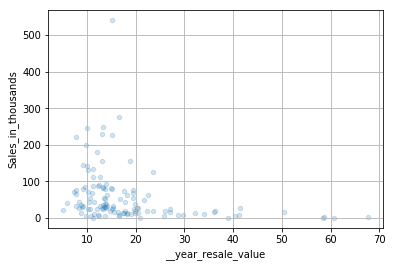

In [9]:
car.plot(kind='scatter',x='__year_resale_value',y='Sales_in_thousands',alpha=0.2)

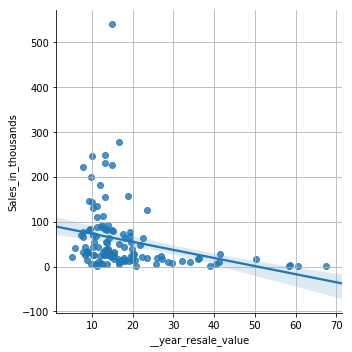

In [10]:
sns.lmplot(x='__year_resale_value',y='Sales_in_thousands',data=car)

In [11]:
numeric_var_names=[key  for key in dict(car.dtypes) if dict(car.dtypes)[key] in  ['float64','int64','int32'] ]
cat_var_names =[key for key in dict(car.dtypes) if dict(car.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']
['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch']


In [12]:
car_sales_num = car[numeric_var_names]
car_sales_num.head(10)

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105
6,1.380,39.000,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,134.656858
7,19.747,NaN,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,71.191207
8,9.231,28.675,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,81.877069
9,17.527,36.125,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,83.998724


In [13]:
car_sales_cat=car[cat_var_names]
car_sales_cat.head(10)

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,2/2/2012
1,Acura,TL,Passenger,6/3/2011
2,Acura,CL,Passenger,1/4/2012
3,Acura,RL,Passenger,3/10/2011
4,Audi,A4,Passenger,10/8/2011
5,Audi,A6,Passenger,8/9/2011
6,Audi,A8,Passenger,2/27/2012
7,BMW,323i,Passenger,6/28/2011
8,BMW,328i,Passenger,1/29/2012
9,BMW,528i,Passenger,4/4/2011


In [14]:
#finding there is any missing value uisng data-audit report
#creating data audit report
def var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.mean(),x.median(),x.std(),x.var(),x.std()/x.mean(),x.min(),
                      x.dropna().quantile(0.01),x.dropna().quantile(0.05),x.dropna().quantile(0.1),x.dropna().quantile(0.25),
                      x.dropna().quantile(0.50),
                      x.dropna().quantile(0.75),x.dropna().quantile(0.90),x.dropna().quantile(0.95),x.dropna().quantile(0.99),
                      x.max()],
                      index=['N','NMISS','SUM','MEAN','MEDIAN','STD','VAR','CV','MIN','P1','P5','P10',
                             'P25','P50','P75','P90','P95',
                             'P99','MAX'])
car_sales_num.apply(var_summary)

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
N,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
NMISS,0.000000,36.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000
SUM,8320.698000,2186.830000,4245.567000,477.500000,29008.000000,16768.000000,11099.400000,29225.600000,523.594000,2800.500000,3672.000000,11941.756636
MEAN,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
MEDIAN,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
STD,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
VAR,4628.002257,131.180007,205.969949,1.091300,3214.926385,58.389512,11.915419,180.412023,0.397532,15.115932,18.341567,632.153558
CV,1.283621,0.633730,0.523960,0.341290,0.304925,0.071090,0.048515,0.071696,0.186648,0.216574,0.179612,0.326343
MIN,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
P1,0.937280,6.173000,10.231440,1.555000,96.400000,92.875000,66.085000,154.915000,2.245400,11.900000,15.000000,38.461920


In [15]:
car['Sales_in_thousands']=car['Sales_in_thousands'].fillna(car['Sales_in_thousands'].mean())

In [30]:
car_sales_num['Sales_in_thousands']=car_sales_num['Sales_in_thousands'].fillna(car_sales_num['Sales_in_thousands'].mean())

C:\Users\Name\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
car_sales_num['__year_resale_value']=car_sales_num['__year_resale_value'].fillna(car_sales_num['__year_resale_value'].mean())

C:\Users\Name\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
def missing_imputation(x):
    x=x.fillna(x.median())
    return x
car_sales_num =car_sales_num.apply(lambda x:missing_imputation(x))

In [17]:
car_sales_num.apply(var_summary)

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
N,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
NMISS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SUM,8320.698000,2697.310000,4291.165000,480.500000,29185.500000,16875.000000,11169.950000,29413.500000,530.278000,2817.700000,3744.000000,12085.818471
MEAN,52.998076,17.180318,27.332261,3.060510,185.894904,107.484076,71.146178,187.347134,3.377567,17.947134,23.847134,76.979735
MEDIAN,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
STD,68.029422,10.178562,14.268713,1.041311,56.522319,7.616872,3.441124,13.388708,0.626460,3.875905,4.241380,24.987338
VAR,4628.002257,103.603121,203.596176,1.084328,3194.772538,58.016732,11.841331,179.257508,0.392452,15.022636,17.989303,624.367061
CV,1.283621,0.592455,0.522047,0.340241,0.304055,0.070865,0.048367,0.071465,0.185477,0.215962,0.177857,0.324596
MIN,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
P1,0.937280,6.736400,10.251160,1.556000,96.480000,92.880000,66.092000,154.968000,2.245600,11.900000,15.000000,38.528203


In [18]:
col_dummies = pd.get_dummies(car['Manufacturer'],prefix='d')
col_dummies.head(5)

,d_Acura,d_Audi,d_BMW,d_Buick,d_Cadillac,d_Chevrolet,d_Chrysler,d_Dodge,d_Ford,d_Honda,...,d_Oldsmobile,d_Plymouth,d_Pontiac,d_Porsche,d_Saab,d_Saturn,d_Subaru,d_Toyota,d_Volkswagen,d_Volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
car_sales_new = pd.concat([car_sales_num,car_sales_cat],axis=1)

In [20]:
car_sales_new.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Manufacturer,Model,Vehicle_type,Latest_Launch
0,16.919,16.360,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,Acura,Integra,Passenger,2/2/2012
1,39.384,19.875,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,Acura,TL,Passenger,6/3/2011
2,14.114,18.225,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,72.030917,Acura,CL,Passenger,1/4/2012
3,8.588,29.725,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,Acura,RL,Passenger,3/10/2011
4,20.397,22.255,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,Audi,A4,Passenger,10/8/2011


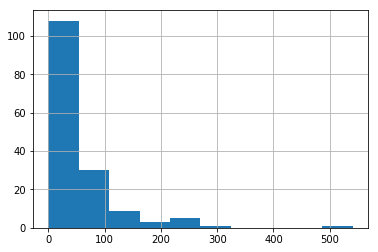

In [21]:
car_sales_new['Sales_in_thousands'].hist()

In [22]:
car_sales_new['LOG_Sales_in_thousands']=np.log(car_sales_new['Sales_in_thousands']+1)

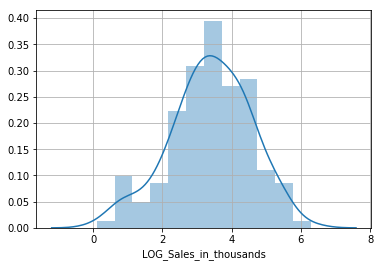

In [23]:
sns.distplot(car_sales_new.LOG_Sales_in_thousands)

In [24]:
car_sales_cat.head()

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,2/2/2012
1,Acura,TL,Passenger,6/3/2011
2,Acura,CL,Passenger,1/4/2012
3,Acura,RL,Passenger,3/10/2011
4,Audi,A4,Passenger,10/8/2011


In [25]:
col_dummies

,d_Acura,d_Audi,d_BMW,d_Buick,d_Cadillac,d_Chevrolet,d_Chrysler,d_Dodge,d_Ford,d_Honda,...,d_Oldsmobile,d_Plymouth,d_Pontiac,d_Porsche,d_Saab,d_Saturn,d_Subaru,d_Toyota,d_Volkswagen,d_Volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
col_dummies.drop(col_dummies.columns[0],axis=1,inplace=True)

In [54]:
col_dummies.head()

,d_Acura,d_Audi,d_BMW,d_Buick,d_Cadillac,d_Chevrolet,d_Chrysler,d_Dodge,d_Ford,d_Honda,...,d_Oldsmobile,d_Plymouth,d_Pontiac,d_Porsche,d_Saab,d_Saturn,d_Subaru,d_Toyota,d_Volkswagen,d_Volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
col_dummies=pd.get_dummies(car['Vehicle_type'],prefix='Vehicle_type')
col_dummies.drop(col_dummies.columns[0],axis=1,inplace=True)
car_sales_cat=pd.concat([car_sales_cat,col_dummies],axis=1)
car_sales_cat.drop('Vehicle_type',axis=1,inplace=True)

In [27]:
car_sales_cat.head()

,Manufacturer,Model,Latest_Launch,Vehicle_type_Passenger
0,Acura,Integra,2/2/2012,1
1,Acura,TL,6/3/2011,1
2,Acura,CL,1/4/2012,1
3,Acura,RL,3/10/2011,1
4,Audi,A4,10/8/2011,1


In [29]:
def create_dummies(df,colname):
    col_dummies=pd.get_dummies(df[colname],prefix=colname)
    col_dummies.drop(col_dummies.columns[0],axis=1,inplace=True)
    df=pd.concat([df,col_dummies],axis=1)
    df.drop(colname,axis=1,inplace=True)
    return df

In [31]:
car_sales_cat=car[['Manufacturer','Vehicle_type']]
for c_feature in ['Manufacturer','Vehicle_type']:
    car_sales_cat[c_feature]=car_sales_cat[c_feature].astype('category')
    car_sales_cat=create_dummies(car_sales_cat,c_feature)

C:\Users\Name\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
car_sales_new =pd.concat([car_sales_num,car_sales_cat],axis=1)

In [33]:
car_sales_new.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,16.919,16.360,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0,0,0,0,0,0,0,0,0,1
1,39.384,19.875,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0,0,0,0,0,0,0,0,0,1
2,14.114,18.225,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0,0,0,0,0,0,0,0,0,1
3,8.588,29.725,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0,0,0,0,0,0,0,0,0,1
4,20.397,22.255,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
import statsmodel